In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
df_raw = pd.read_csv("../h4_example/models_csv/Hubbard_models.csv")
df_raw = df_raw[df_raw['r']> 2.6]

In [4]:
rs = np.sort(np.unique(df_raw['r']))
rs
U = []
t = []
E0 = []
for r in rs:
    df_tmp = df_raw[df_raw['r']==r]
    U.append(np.mean(df_tmp['U']))
    t.append(np.mean(df_tmp['t']))
    E0.append(np.mean(df_tmp['E0']))

U = np.array(U)
t = np.array(t)
E0 = np.array(E0)

In [5]:
detailed_rs = np.round(np.arange(2.0, 10.0, 0.1), decimals=2)

In [6]:
def func_t(rs, C, d, r_0):
    #x = -np.exp(-d*rs) # exponential 
    # C is carrying capacity, i.e. min(t) 
    x = (C/(1+np.exp(-d*(rs-r_0)))) - C  # sigmoid, logistic
    return x 

def func_U_1(rs, beta):
    return 0.5 - (beta/rs) # morse instead?

def func_U_2(rs, d, r_0):
    x = (0.5/(1+np.exp(-d*(rs-r_0)))) # sigmoid, logistic
    return x

def func_E0(rs, d, r_0):
    x = np.exp(-d*(rs-r_0)) - 0.5
    return x 

In [7]:
popt_t, pcov_t = curve_fit(func_t, rs, t)
popt_t

array([0.26874798, 0.9011011 , 2.23037947])

In [8]:
t_func = func_t(rs, popt_t[0], popt_t[1], popt_t[2])
t_r_squ = r2_score(t, t_func)
print(f'R^2 for t is {t_r_squ}')

t_func_detailed = func_t(detailed_rs, popt_t[0], popt_t[1], popt_t[2])

R^2 for t is 0.9993375263328015


In [9]:
poly, R, x, y, z = np.polyfit(rs, U, 3, full=True) # odd degree so one value goes to infinity
print(poly)
print(R)
U_func_poly = np.poly1d(poly)

[ 0.00250524 -0.03876784  0.21155143 -0.08585794]
[1.76530299e-05]


In [10]:
U_func = U_func_poly(rs)
U_r_squ = r2_score(U, U_func)
print(f'R^2 for U is {U_r_squ}')

U_func_detailed = np.clip(U_func_poly(detailed_rs), a_min=None, a_max=0.5)

R^2 for U is 0.9982351479002289


In [11]:
popt_E0, pcov_E0 = curve_fit(func_E0, rs, E0)
popt_E0

array([1.30933243, 0.3316036 ])

In [12]:
E0_func = func_E0(rs, popt_E0[0], popt_E0[1])
E0_r_squ = r2_score(E0, E0_func)
print(f'R^2 for E0 is {E0_r_squ}')

E0_func_detailed = func_E0(detailed_rs, popt_E0[0], popt_E0[1])

R^2 for E0 is 0.9988240210955728


# Plot 4.1 & 4.2 - Parameters and Interpolation

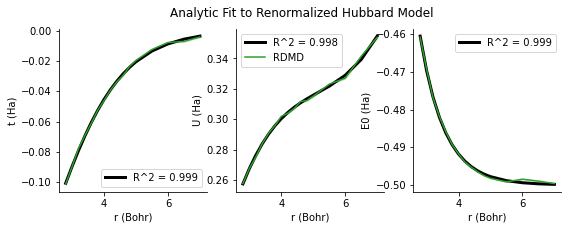

In [13]:
# t and U plots with their functional forms
fig, ax = plt.subplots(1,3, figsize=(9,3), sharey=False)

ax[0].plot(rs, t_func, c='k', label=f'R^2 = {np.round(t_r_squ, 3)}', linewidth=3)
ax[1].plot(rs, U_func, c='k', label=f'R^2 = {np.round(U_r_squ,3)}', linewidth=3)
ax[2].plot(rs, E0_func, c='k', label=f'R^2 = {np.round(E0_r_squ,3)}', linewidth=3)

sns.lineplot(data=df_raw, x='r', y='t', ax=ax[0], legend = True, color='tab:green')
sns.lineplot(data=df_raw, x='r', y='U', ax=ax[1], label='RDMD',legend=True, color='tab:green')
sns.lineplot(data=df_raw, x='r', y='E0', ax=ax[2],legend=True, color='tab:green')

ax[0].set_ylabel("t (Ha)")
ax[1].set_ylabel("U (Ha)")
ax[2].set_ylabel("E0 (Ha)")

ax[0].set_xlabel("r (Bohr)")
ax[1].set_xlabel("r (Bohr)")
ax[2].set_xlabel("r (Bohr)")

fig.suptitle("Analytic Fit to Renormalized Hubbard Model")

sns.despine()
#plt.savefig("plot4-1_parameters.pdf", bbox_inches='tight', transparent=True)
plt.savefig("plot4-1_parameters.png", bbox_inches='tight', transparent=True, dpi=300)

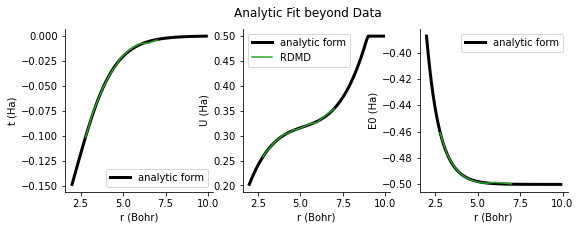

In [14]:
# t and U plots with their functional forms
fig, ax = plt.subplots(1,3, figsize=(9,3), sharey=False)

ax[0].plot(detailed_rs, t_func_detailed, c='k', label='analytic form', linewidth=3)
ax[1].plot(detailed_rs, U_func_detailed, c='k', label='analytic form', linewidth=3)
ax[2].plot(detailed_rs, E0_func_detailed, c='k', label='analytic form', linewidth=3)

sns.lineplot(data=df_raw, x='r', y='t', ax=ax[0], legend = True, color='tab:green')
sns.lineplot(data=df_raw, x='r', y='U', ax=ax[1], label='RDMD',legend=True, color='tab:green')
sns.lineplot(data=df_raw, x='r', y='E0', ax=ax[2],legend=True, color='tab:green')

ax[0].set_ylabel("t (Ha)")
ax[1].set_ylabel("U (Ha)")
ax[2].set_ylabel("E0 (Ha)")

ax[0].set_xlabel("r (Bohr)")
ax[1].set_xlabel("r (Bohr)")
ax[2].set_xlabel("r (Bohr)")

fig.suptitle("Analytic Fit beyond Data")

sns.despine()
#plt.savefig("plot4-1_parameters.pdf", bbox_inches='tight', transparent=True)
plt.savefig("plot4-2_interpolation_parameters.png", bbox_inches='tight', transparent=True, dpi=300)

# Plot 4.3? Parameters for Scaled System?

#### Write how to process data in another file

In [15]:
df_pro = pd.read_csv("../h4_example/models_csv/Processed_t-U_model_data.csv")

# Plot 4.4 Spectrum

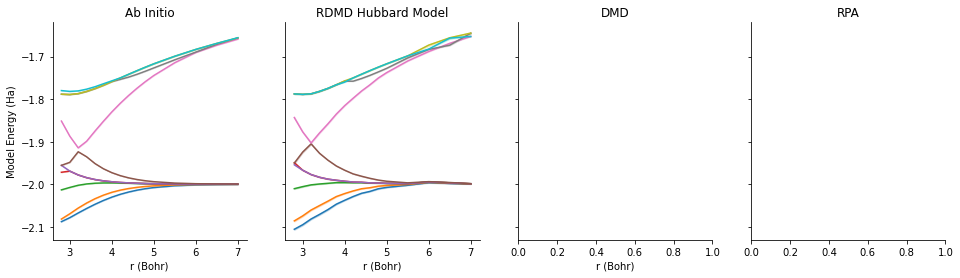

In [27]:
# Spectral data for ab initio, cRPA,, dmd, rdmd
df_pro['state'] = pd.Categorical(df_pro['state'])
ncols=4
fig, ax = plt.subplots(1,ncols, figsize=(4*ncols,4), sharey=True)

sns.lineplot(data=df_pro, x='r', y='ai_energy', hue='state', ax=ax[0],legend=False )
ax[0].set_title("Ab Initio")

sns.lineplot(data=df_pro, x='r', y='model_energy', hue='state', ax=ax[1], legend = False)
ax[1].set_title("RDMD Hubbard Model")

#sns.lineplot(data=df_pro, x='r', y='functional model energy (Ha)', hue='state', ax=ax[2],legend=False )
#ax[2].set_title("Functional Fit")

ax[2].set_title("DMD")

ax[3].set_title("RPA")

ax[0].set_ylabel("Model Energy (Ha)")

ax[0].set_xlabel("r (Bohr)")
ax[1].set_xlabel("r (Bohr)")
ax[2].set_xlabel("r (Bohr)")

sns.despine()
#plt.savefig("plot4-4_spectrum.png.pdf", bbox_inches='tight', transparent=True)

plt.savefig("plot4-4_spectrum.png", bbox_inches='tight', transparent=True, dpi=300)

# Plot 4.5 Excitation Energies

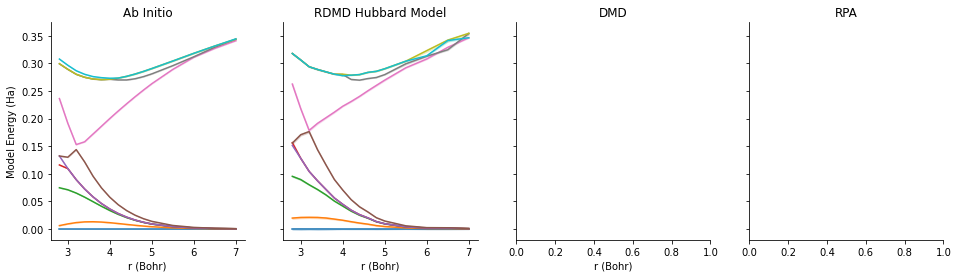

In [28]:
# Excitation data for ab initio, cRPA,, dmd, rdmd
df_pro['state'] = pd.Categorical(df_pro['state'])
ncols=4
fig, ax = plt.subplots(1,ncols, figsize=(4*ncols,4), sharey=True)

sns.lineplot(data=df_pro, x='r', y='AI Excitation Energy', hue='state', ax=ax[0],legend=False )
ax[0].set_title("Ab Initio")

sns.lineplot(data=df_pro, x='r', y='Model Excitation Energy', hue='state', ax=ax[1], legend = False)
ax[1].set_title("RDMD Hubbard Model")

#sns.lineplot(data=df_pro, x='r', y='functional model energy (Ha)', hue='state', ax=ax[2],legend=False )
#ax[2].set_title("Functional Fit")

ax[2].set_title("DMD")

ax[3].set_title("RPA")

ax[0].set_ylabel("Model Energy (Ha)")

ax[0].set_xlabel("r (Bohr)")
ax[1].set_xlabel("r (Bohr)")
ax[2].set_xlabel("r (Bohr)")

sns.despine()
#plt.savefig("plot4-4_spectrum.png.pdf", bbox_inches='tight', transparent=True)

plt.savefig("plot4-5_spectrum.png", bbox_inches='tight', transparent=True, dpi=300)